# Deep learning Flow

In [236]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 변하지 않는 Deep learning Flow 

<img src=../statics/imgs/dl_flow.png> </img>
> data > preprocess > model > evaluation

## 1. Data 가져오기

TensorFlow에서 제공하는 MNIST 예제

- 데이터 shape, dtype 확인하기

In [237]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

--------------------

In [238]:
print(train_x.shape)
print(train_x.dtype)    #    uint8 : 
print(train_y.shape)
print(train_y.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


In [239]:
image = train_x[77]
image.shape

(28, 28)

In [240]:
train_x[77].shape
# 784개의 fixel로 만들어졌다.

(28, 28)

In [241]:
# image = train_x[77:78]
# image.shape

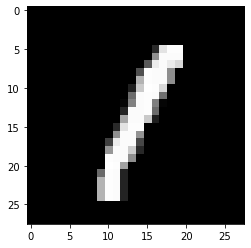

In [242]:
plt.imshow(image, 'gray')
    # image plot 을 만든다
plt.show()

#### 데이터를 받으면 데이터를 이해하기 위해 노력해야합니다! 


#### ex> 훈련용 데이터셋(train_x)에는 각 숫자의 그림이 몇개씩 들어가 있나? (QUIZ)

----

In [243]:
y_unique, y_counts = np.unique(train_y, return_counts=True)

In [244]:
y_unique, y_counts, y_counts.sum()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]),
 60000)

In [245]:
# 시각화
df_view = pd.DataFrame(data={'count' : y_counts}, index = y_unique)
            # DataFrame으로 변환
                        # data는 'count' 컬럼에 y_counts를 입력
                                                # index 는 y_unique를 사용

In [246]:
df_view

,count
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


In [247]:
df_view.sort_values('count', ascending=True)
        # sort_values의 기준을 'count'로 한다.
                            # 오름차순으로 정렬

,count
5,5421
4,5842
8,5851
6,5918
0,5923
9,5949
2,5958
3,6131
7,6265
1,6742


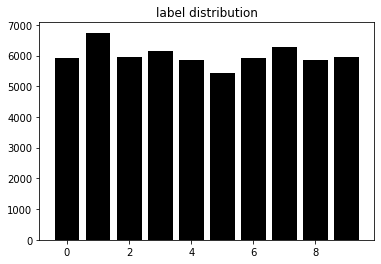

In [248]:
plt.bar(x=y_unique, height = y_counts, color = 'black')
    # bar로 나타 낼 건데,
        # x 축은 y_unique,
                    # height(y축) 는 y_counts
                                        # bar 색상은 'black'
plt.title('label distribution')
    # plot의 제목(title)은 'label distribution'으로 지정
plt.show()

### 막간 퀴즈

다음 코드를 완성하여, 아래 이미지를 시계 반대 방향으로 90도 회전하고 아래위를 반전 시키기

In [249]:
image = tf.constant(image)
            # transpose를 하기 위해서는 tf. 처리를 해야한다.

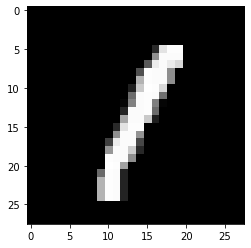

In [250]:
plt.imshow(image, 'gray')
plt.show()

In [251]:
# plt.imshow(?????????(image), 'gray')
# plt.show()

----

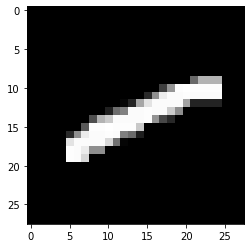

In [252]:
plt.imshow(tf.transpose(image), 'gray')     
            # 90도로 회전 및 아래위 반전 (tf.transpose)
plt.show()

## 2. Preprocessing

- 데이터 검증 
- 전처리 
- 데이터 증강 ... (이 건 추후에!)

#### 데이터 검증 

 - 데이터 중에 학습에 포함 되면 안되는 것이 있는가? ex> 개인정보가 들어있는 데이터, 테스트용 데이터에 들어있는것, 중복되는 데이터
 - 학습 의도와 다른 데이터가 있는가? ex> 얼굴을 학습하는데 발 사진이 들어가있진 않은지(가끔은 의도하고 일부러 집어넣는 경우도 있음)
 - 라벨이 잘못된 데이터가 있는가? ex> 7인데 1로 라벨링, 고양이 인데 강아지로 라벨링 
 -  ... 등
 

In [253]:
def validate_pixel_scale(x):
    return 255 >= x.max() and 0 <= x.min()
            # x.max()의 값이 255 이하 이거나
                            # x.min()의 값이 0 이상이면 True를 반환

In [254]:
validated_train_x = np.array([x for x in train_x if validate_pixel_scale(x)])
                                    # train_x에서 x를 뽑을 때,
                                                # 만약 validate_pixel_scale(x)의 값이 True이면
                            # x를 리스트에 넣고, 아니면 넣지 않는다.
validated_train_y = np.array([y for x, y in zip(train_x, train_y) if validate_pixel_scale(x)])
                                    # zip(train_x, train_y)에서 x, y을 뽑고,
                                                                # 만약 validate_pixel_scale(x)가 True이면
                            # y를 리스트에 넣는다.

In [255]:
print(validated_train_x.shape)
print(validated_train_y.shape)

(60000, 28, 28)
(60000,)


In [256]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### 전처리 

 - 입력하기 전에 모델링에 적합하게 처리! 
 - 대표적으로 Scaling, Resizing, label encoding 등이 있다. 
 - dtype, shape 항상 체크!!

##### Scaling

In [257]:
def scale(x):
    return (x / 255.0).astype(np.float32)    # 0 ~ 1 사이 값으로 만들어준다.
            # x/255.0 을 return 하는데,
                        # dtype을 np.float32 타입으로 반환한다.

In [258]:
scaled_train_x = np.array([scale(x) for x in validated_train_x])
                                        # validated_train_x 에서 x(원소)를 뽑아
                            # scale(x)에 넣고 (x/255.0)의 값을 리스트에 저장한 후
                # np.array()로 저장한다.

In [259]:
# test code
sample = scale(validated_train_x[777])

In [260]:
sample.max(), sample.min()

(1.0, 0.0)

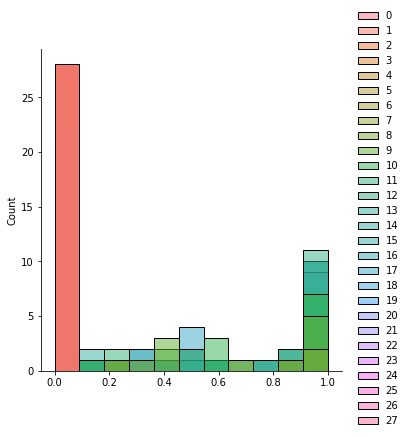

In [261]:
sns.displot(sample)

##### Flattening

 - 이번에 사용할 모델은 기본적인 Feed-Forward Neural Network
 - 1차원 벡터가 Input의 샘플 하나가 된다. (2차원 텐서라는 말)

In [262]:
scaled_train_x.shape
# 60000개, 28 컬럼, 28데이터 (?)

(60000, 28, 28)

In [263]:
# validated_train_x.reshape((60000, -1))
flattend_train_x = scaled_train_x.reshape((60000, -1))
                                                # 28 * 28 = 784 로 flatten 하였다. (-1)

In [264]:
flattend_train_x.shape

(60000, 784)

##### Label encoding

 - One-Hot encoding
 - `tf.keras.utils.to_categorical` 사용! 

In [265]:
tf.keras.utils.to_categorical(5, num_classes=10)        # 10 개 중 5번째 클래스
                            # index 5의 값을 1
                                # num_classes 의 len 을 10으로 // 전체 10개 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [266]:
# tf.keras.utils.to_categorical 연습
test = tf.keras.utils.to_categorical(2, num_classes=10)
test

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [267]:
# 원 핫 인코딩
ohe_train_y = np.array([tf.keras.utils.to_categorical(5, num_classes=10) \
    for y in validated_train_y])

In [268]:
print(ohe_train_y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [269]:
ohe_train_y.shape

(60000, 10)

### 보통은 큰 작업을 하나의 클래스로 만들어서 관리한다. 


In [270]:
class DataLoader():

    def __init__(self):
        (self.train_x, self.train_y), \
            (self.test_x, self.test_y) = tf.keras.datasets.mnist.load_data()

        # (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

    def validate_pixel_scale(self, x):
        return 255 >= x.max() and 0 <= x.min()

    def scale(self, x):
        return (x / 255.0).astype(np.float32)

    def preprocess_dataset(self, dataset):
        feature, target = dataset

        validated_x = np.array([x for x in feature if self.validate_pixel_scale(x)])
        validated_y = np.array([y for x,y in zip(feature, target) if self.validate_pixel_scale(x)])

        # scale
        scaled_x = np.array([self.scale(x) for x in validated_x])
        
        # flatten
        flatten_x = scaled_x.reshape((scaled_x.shape[0], -1))

        # label encoding
        ohe_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in validated_y])

        return flatten_x, ohe_y
    
    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))
    
    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))

In [271]:
mnist_loader = DataLoader()

In [272]:
train_x, train_y = mnist_loader.get_train_dataset()

In [273]:
## 의문점 발생
# - test 데이터에 적용시키려면 get_test_dataset() 으로 해야하는 것 아닌가요?

# test_x, test_y = mnist_loader.get_test_dataset()
test_x, test_y = mnist_loader.get_train_dataset()

In [274]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [275]:
test_x.shape, test_y.shape

((60000, 784), (60000, 10))

## 3. Modeling
 1. 모델 정의 
 2. 학습 로직 - 비용함수, 학습파라미터 세팅
 3. 학습


#### 모델 정의

In [276]:
from tensorflow.keras.layers import Dense, Activation      
                                    # Dense layer : FFNN 그 자체
                                            # Activation layer

In [277]:
model = tf.keras.Sequential()

In [278]:
# Dense(15)

In [279]:
model.add(Dense(15, input_dim = 784))
                # node 개수
                    # 
model.add(Activation('sigmoid'))
                    # 
model.add(Dense(10))
                # output이 10개의 모델임
model.add(Activation('softmax'))
                    #

In [280]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                11775     
                                                                 
 activation_8 (Activation)   (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                160       
                                                                 
 activation_9 (Activation)   (None, 10)                0         
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


#### 학습 로직

In [281]:
opt = tf.keras.optimizers.SGD(0.03)
                                # learning rate = 0.03
loss = tf.keras.losses.categorical_crossentropy
                        # 분류문제를 풀 때는 categorical_crossentropy 사용

In [282]:
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

#### 학습 실행

In [283]:
hist = model.fit(train_x, train_y, epochs=10, batch_size=256)
                            # 기본 epochs = 1 회
                                        # 기본 batch_size = 32 >> 1875 = 60000/32

## 학습만 하고 끝남.

Epoch 1/10
235/235 [==============================] - 0s 865us/step - loss: 2.0587 - accuracy: 0.4383
Epoch 2/10
235/235 [==============================] - 0s 653us/step - loss: 1.6601 - accuracy: 0.6644
Epoch 3/10
235/235 [==============================] - 0s 647us/step - loss: 1.3687 - accuracy: 0.7380
Epoch 4/10
235/235 [==============================] - 0s 649us/step - loss: 1.1591 - accuracy: 0.7783
Epoch 5/10
235/235 [==============================] - 0s 640us/step - loss: 1.0069 - accuracy: 0.8025
Epoch 6/10
235/235 [==============================] - 0s 641us/step - loss: 0.8937 - accuracy: 0.8207
Epoch 7/10
235/235 [==============================] - 0s 644us/step - loss: 0.8077 - accuracy: 0.8325
Epoch 8/10
235/235 [==============================] - 0s 634us/step - loss: 0.7408 - accuracy: 0.8410
Epoch 9/10
235/235 [==============================] - 0s 704us/step - loss: 0.6877 - accuracy: 0.8483
Epoch 10/10
235/235 [==============================] - 0s 658us/step - loss: 0.644

In [284]:
hist

In [285]:
hist.history

{'loss': [2.058748245239258,
  1.6601380109786987,
  1.3687351942062378,
  1.159058690071106,
  1.0068979263305664,
  0.8937408924102783,
  0.8076717257499695,
  0.7407666444778442,
  0.6876872777938843,
  0.6447018980979919],
 'accuracy': [0.4383000135421753,
  0.6644166707992554,
  0.7379666566848755,
  0.7782666683197021,
  0.802483320236206,
  0.8207333087921143,
  0.8325333595275879,
  0.8409500122070312,
  0.8483333587646484,
  0.8543833494186401]}

## 4. Evaluation 
    - 학습 과정 추적 
    - Test / 모델 검증
    - 후처리

##### 학습 과정 추적

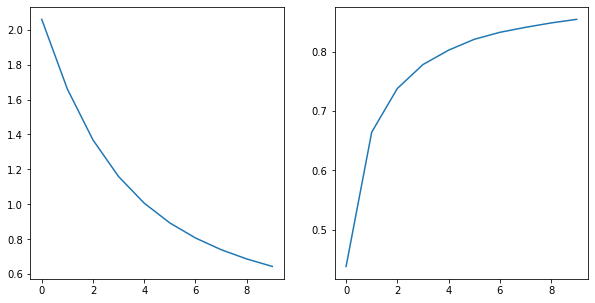

In [286]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(hist.history['loss'])
plt.subplot(122)
plt.plot(hist.history['accuracy'])

plt.show()

# 1자형 곡선은 학습이 잘 안된것.
# 학습이 잘 된 것은 L자형임

##### 모델 검증

In [287]:
model.evaluate(test_x, test_y)

1875/1875 [==============================] - 1s 290us/step - loss: 0.6254 - accuracy: 0.8577


[0.6254056096076965, 0.8577166795730591]

##### 후처리

In [288]:
pred = model.predict(test_x[:1])

In [289]:
pred.argmax()       # 후처리

5

In [290]:
sample_img = test_x[0].reshape((28, 28)) * 255      # 원상복구
                                        # * 255 를 안해도 상관없음

In [291]:
test_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

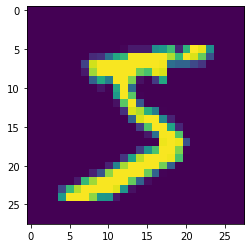

In [292]:
plt.imshow(sample_img)
plt.show()